In [1]:
%matplotlib inline

# ALE meta-analysis

In [2]:
import os
from os import listdir
from os.path import isfile, join
import nibabel as nib
from pathlib import Path

import matplotlib.pyplot as plt
from nilearn.plotting import plot_stat_map
from nimare.io import convert_sleuth_to_dataset
from nimare.utils import get_resource_path

from nimare.correct import FWECorrector
from nimare.meta.cbma import ALE
import pickle
import csv

ERROR:duecredit:Failed to import duecredit due to No module named 'duecredit'


In [3]:
_dset_folder = r'../data_db/dataset_ale/'
_nii_folder = r'../data_db/nifti-ale/check-z/'
_res_folder = r'../data_db/res/check-z/'

## ALE Working Memory: visual task stimulus and task modality n-task

In [4]:
dsetfiles = {Path(f).stem: f for f in listdir(_dset_folder) if isfile(join(_dset_folder, f))}

In [5]:
files = {k: os.path.join(os.path.abspath(_dset_folder), file_name) for k, file_name in dsetfiles.items()}
dsets = {k: convert_sleuth_to_dataset(f) for k, f in files.items()}

In [6]:
corrected_results = {}
# ale = ALE(null_method="montecarlo",n_iters=100,n_cores=8)
ale = ALE(null_method="approximate")
corr = FWECorrector(method="montecarlo", voxel_thresh=0.001, n_iters=100, n_cores=8)
for index, (k, dset) in enumerate(dsets.items()):
    result = ale.fit(dset)
    corrected_results[k] = corr.transform(result)

INFO:nimare.correct:Using correction method implemented in Estimator: nimare.meta.cbma.ale.ALE.correct_fwe_montecarlo.
100%|██████████| 100/100 [00:06<00:00, 15.34it/s]
INFO:nimare.meta.cbma.base:Using null distribution for voxel-level FWE correction.
INFO:nimare.correct:Using correction method implemented in Estimator: nimare.meta.cbma.ale.ALE.correct_fwe_montecarlo.
100%|██████████| 100/100 [00:05<00:00, 19.92it/s]
INFO:nimare.meta.cbma.base:Using null distribution for voxel-level FWE correction.
INFO:nimare.correct:Using correction method implemented in Estimator: nimare.meta.cbma.ale.ALE.correct_fwe_montecarlo.
100%|██████████| 100/100 [00:03<00:00, 30.17it/s]
INFO:nimare.meta.cbma.base:Using null distribution for voxel-level FWE correction.
INFO:nimare.correct:Using correction method implemented in Estimator: nimare.meta.cbma.ale.ALE.correct_fwe_montecarlo.
100%|██████████| 100/100 [00:04<00:00, 21.93it/s]
INFO:nimare.meta.cbma.base:Using null distribution for voxel-level FWE corr

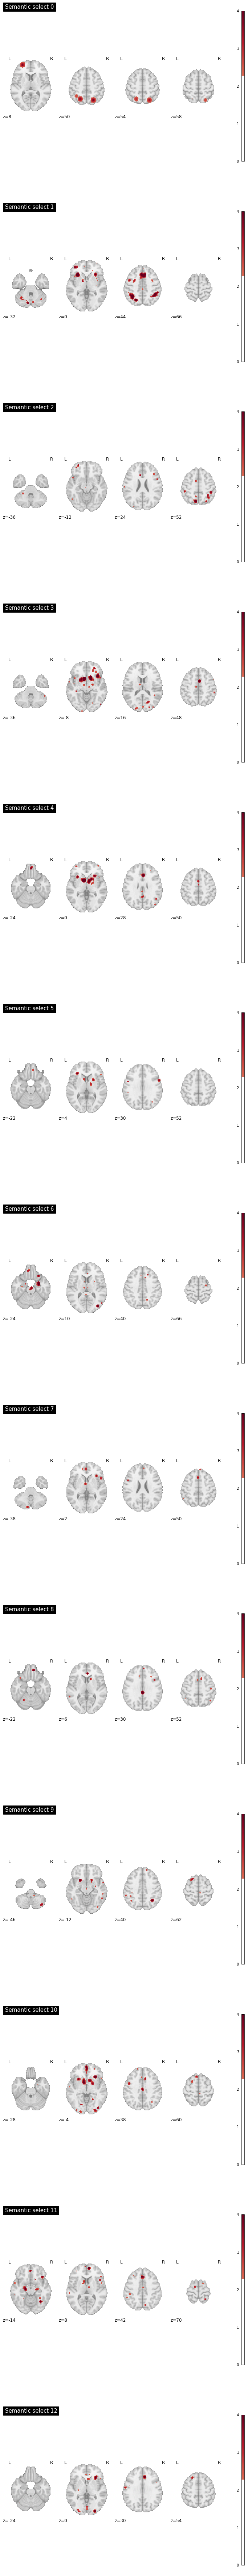

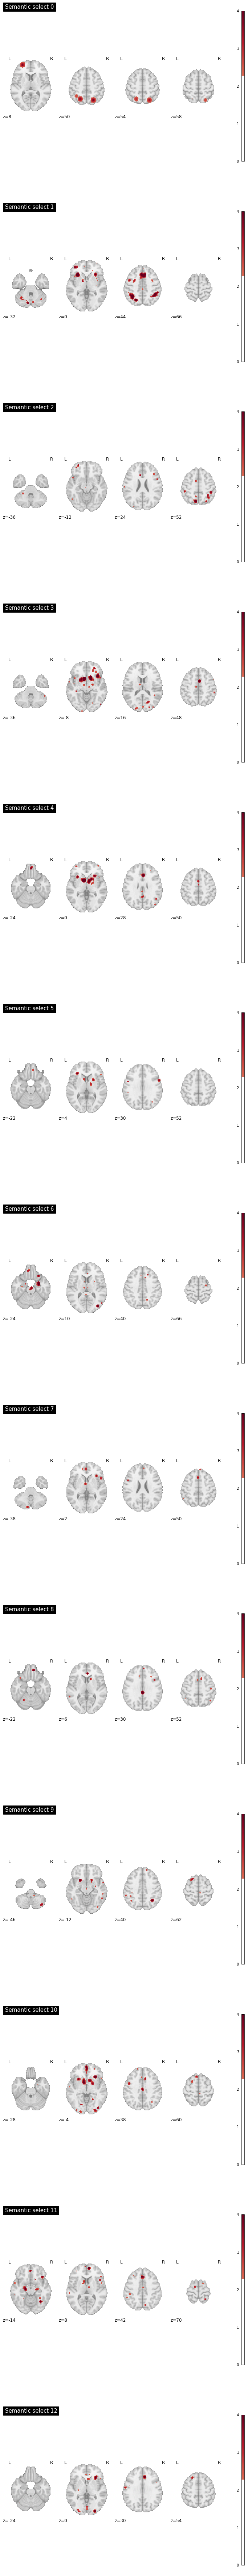

In [11]:
## Check
map_name = "z"
imgs = {}
res_len = len(corrected_results)
fig, axes = plt.subplots(figsize=(12, res_len * 10), nrows=res_len)
for index, (k, corr_result) in enumerate(corrected_results.items()):
    imgs[k] = corr_result.get_map(
        map_name
    )

    plot_stat_map(
        imgs[k],
        cut_coords=4,
        display_mode="z",
        title="Semantic select " + str(index),
        threshold=2.326,  #'auto' # cluster-level p < .01, one-tailed
        cmap="RdBu_r",
        vmax=4,
        axes=axes[index],
        figure=fig,
    )


## Save images to nifti

In [13]:
for index, (file_name, img) in enumerate(imgs.items()):
    nib.save(img, os.path.join(os.path.abspath(_nii_folder), file_name + '.nii'))
    nib.save(corrected_results[file_name].get_map('z'),
             os.path.join(os.path.abspath(_nii_folder), file_name + '-z.nii'))

## Statistics

In [14]:
from IPython.display import display
from nimare.diagnostics import FocusCounter

counter = FocusCounter(
    target_image="z",
    voxel_thresh=None,
)
for index, (file_name, corr_res) in enumerate(corrected_results.items()):
    print(file_name)
    count_table, _ = counter.transform(corr_res)
    print(count_table.shape)
    display(count_table)

select00_test


100%|██████████| 1/1 [00:00<00:00, 76.86it/s]

(2, 3)


,1,2,3
Cluster ID,,,
Center of Mass,"(23, -67, 49)","(-29, -58, 44)","(-27, 54, 7)"
Test test test-,1,2,1


select01_wm


100%|██████████| 12/12 [00:00<00:00, 20.32it/s]

(13, 10)


,1,2,3,4,5,6,7,8,9,10
Cluster ID,,,,,,,,,,
Center of Mass,"(1, -13, 13)","(47, 0, -26)","(27, -91, 3)","(26, -61, 4)","(2, 8, -18)","(0, -38, 20)","(-1, -22, 38)","(-38, -20, 16)","(-48, 3, -32)","(-63, -25, 2)"
Beneventi et al-An fMRI study of working memor..,23,0,1,0,0,0,0,0,0,0
Carrion et al-Frontal Hypoactivation on Func..,34,0,0,0,0,0,0,0,0,0
Di et al-Anterior cingulate cortex diff..,21,0,0,0,0,1,2,1,0,1
Drobyshevsky et al-A Rapid fMRI Task Battery for ..,13,0,0,0,0,0,0,0,0,0
Duggirala et al-Stimulus-dependent modulation ..,62,0,0,0,0,0,0,0,0,0
Lee et al-Abnormal neural activity in pa..,54,0,0,1,0,0,0,0,0,1
Padilla et al-Long-term brain effects of N-b..,22,0,0,0,0,0,0,0,0,1
Pochon et al-The neural system that bridges..,33,3,0,0,1,0,0,0,2,1


select02_wm_decision-making


100%|██████████| 3/3 [00:00<00:00, 27.00it/s]

(4, 2)


,1,2
Cluster ID,,
Center of Mass,"(-3, -19, 18)","(-10, -90, 0)"
Cruz et al-Alterations in the functional ..,25,1
Nobre et al-Orienting Attention to Locatio..,38,0
Reilhac et al-Role of the superior parietal ..,34,0


select03_reward_anticipation_rw-norw


100%|██████████| 8/8 [00:00<00:00, 36.66it/s]

(9, 4)


,1,2,3,4
Cluster ID,,,,
Center of Mass,"(3, -16, 8)","(46, -51, -35)","(-28, -54, 46)","(-53, -35, 19)"
Cohen et al-Individual differences in extr..,12,1,0,1
John O Doherty et al-Neural Responses during Antici..,5,0,0,0
Kirscg et al-Anticipation of reward in a no..,39,0,0,1
Knutson et al-A region of mesial prefrontal ..,9,0,1,0
Knutson et al-Anticipation of Increasing Mon..,10,0,0,0
Knutson et al-Dissociation of reward anticip..,13,0,0,0
Koeneke et al-Individual preferences modulat..,5,0,0,0
Spreckelmeyer et al-Anticipation of monetary and s..,17,0,0,0


select04_reward_anticipation_high_low_rew


100%|██████████| 8/8 [00:00<00:00, 34.16it/s]

(9, 3)


,1,2,3
Cluster ID,,,
Center of Mass,"(5, -11, 6)","(0, -44, 2)","(-56, -43, -6)"
Abler et al-From uncertainty to reward - B..,21,0,1
Croxson et al-Effort-Based Cost Benefit Valu..,9,0,0
Jarcho et al-Developmental effects of decis..,12,0,0
Knutson et al-Anticipation of Increasing Mon..,12,0,0
Knutson et al-Distributed Neural Representat..,26,0,0
Smith et al-Neural substrates of reward ma..,9,0,1
Spreckelmeyer et al-Anticipation of monetary and s..,47,0,0
Tobler et al-Reward Value Coding Distinct F..,14,0,0


select05_reward_anticipation_exp_recv_rew


100%|██████████| 3/3 [00:00<00:00, 51.68it/s]

(4, 3)


,1,2,3
Cluster ID,,,
Center of Mass,"(-2, 6, 3)","(33, -47, 33)","(-10, -66, 38)"
John O Doherty et al-Neural Responses during Antici..,8,0,0
Rademacher et al-Dissociation of neural network..,19,5,1
Tobler et al-Reward Value Coding Distinct F..,5,0,0


select06_reward_outcome_rw-norw


100%|██████████| 10/10 [00:00<00:00, 42.16it/s]

(11, 1)


,1
Cluster ID,
Center of Mass,"(6, -16, 7)"
Cohen et al-Individual differences in extr..,23
Elliott et al-Differential Response Patterns..,6
Elliott et al-Instrumental responding for re..,12
John O Doherty et al-Neural Responses during Antici..,4
Knutson et al-A region of mesial prefrontal ..,4
Knutson et al-Dissociation of reward anticip..,4
Koeneke et al-Individual preferences modulat..,28
Schienle et al-Binge-Eating Disorder Reward ..,12


select07_reward_outcome_risk-safe


100%|██████████| 3/3 [00:00<00:00, 46.83it/s]

(4, 5)


,1,2,3,4,5
Cluster ID,,,,,
Center of Mass,"(62, -31, -3)","(42, 22, 2)","(-23, -75, 6)","(1, 39, 26)","(-31, 1, 1)"
Abler et al-From uncertainty to reward - B..,0,0,2,0,3
Lawrence et al-Distinct Roles of Prefrontal C..,0,2,1,9,7
Xue et al-Functional Dissociations of Ri..,1,0,8,5,2


select08_reward_outcome_high-low


100%|██████████| 9/9 [00:00<00:00, 35.26it/s]

(10, 4)


,1,2,3,4
Cluster ID,,,,
Center of Mass,"(6, -14, 13)","(50, 0, -33)","(-43, 3, 35)","(-52, -40, -4)"
Abler et al-From uncertainty to reward - B..,14,0,1,1
Cloutier et al-Are Attractive People Rewardin..,18,0,0,1
Delgado et al-Dorsal striatum responses to r..,11,0,0,0
Elliott et al-Dissociable Neural Responses i..,1,0,0,0
Jarcho et al-Developmental effects of decis..,21,0,2,1
Knutson et al-Dissociation of reward anticip..,6,0,0,0
Nieuwenhuis et al-Activity in human reward-sensi..,10,0,0,0
Signe Bray and John O'Doherty-Neural Coding of Reward-Predic..,5,0,0,0


select09_reward_outcome_win-lose


100%|██████████| 6/6 [00:00<00:00, 27.00it/s]

(7, 6)


,1,2,3,4,5,6
Cluster ID,,,,,,
Center of Mass,"(0, -9, 19)","(32, -85, -6)","(36, -70, -43)","(11, -43, -47)","(-17, -94, -1)","(-23, -67, -39)"
Christakou et al-Right Ventromedial and Dorsola..,8,0,0,0,0,0
Fujiwara et al-Segregated and Integrated Codi..,17,0,0,0,0,1
Greck et al-Is our self based on reward - ..,19,0,1,0,0,0
Lawrence et al-Distinct Roles of Prefrontal C..,10,0,1,1,0,1
Vassena et al-Dissociating contributions of ..,32,2,0,0,2,0
Xue et al-Functional Dissociations of Ri..,25,0,0,0,0,0


select10_reward_decision-making_outcome


100%|██████████| 22/22 [00:00<00:00, 24.42it/s]

(23, 5)


,1,2,3,4,5
Cluster ID,,,,,
Center of Mass,"(0, -15, 13)","(63, -14, -22)","(53, 0, -35)","(6, -44, -44)","(-10, -83, -37)"
Abler et al-From uncertainty to reward - B..,26,0,0,0,0
Akitsuki et al-Context-dependent cortical act..,33,2,0,0,0
Christakou et al-Right Ventromedial and Dorsola..,13,0,0,0,0
Cohen et al-Individual differences in extr..,23,0,0,0,0
Cox et al-Learning to Like A Role for H..,20,0,0,1,0
Delgado et al-Tracking the Hemodynamic Respo..,31,0,0,0,0
Elliott et al-Dissociable Neural Responses i..,18,0,0,0,0
Elliott et al-Instrumental responding for re..,19,0,0,0,0


select11_reward_decision-making_anticipation


100%|██████████| 7/7 [00:00<00:00, 31.08it/s]

(8, 3)


,1,2,3
Cluster ID,,,
Center of Mass,"(-1, -10, 11)","(18, -59, -49)","(-24, -54, 63)"
Abler et al-From uncertainty to reward - B..,38,0,0
Cohen et al-Individual differences in extr..,14,0,0
Jarcho et al-Developmental effects of decis..,21,1,0
Koeneke et al-Individual preferences modulat..,5,0,0
Rosell-Negre et al-Monetary reward magnitude effe..,10,0,1
Smith et al-Neural substrates of reward ma..,14,0,0
Tobler et al-Reward Value Coding Distinct F..,19,0,0


select12_reward_decision-making_decision


100%|██████████| 4/4 [00:00<00:00, 43.92it/s]

(5, 5)


,1,2,3,4,5
Cluster ID,,,,,
Center of Mass,"(0, 21, 16)","(1, -77, -6)","(28, -62, 38)","(-24, -24, -5)","(-24, -66, 44)"
Lawrence et al-Distinct Roles of Prefrontal C..,5,0,0,0,0
Rogers et al-Distinct Portions of Anterior ..,24,0,0,0,0
Schonberg et al-Decreasing ventromedial prefro..,9,7,0,1,0
Vassena et al-Dissociating contributions of ..,7,3,1,1,1


## Conjunctions

In [15]:
import copy
from nilearn.image import math_img
import numpy as np

In [16]:
tmp_imgs = copy.deepcopy(imgs)

In [17]:
dict_keys = list(tmp_imgs.keys())
dict_keys

['select00_test',
 'select01_wm',
 'select02_wm_decision-making',
 'select03_reward_anticipation_rw-norw',
 'select04_reward_anticipation_high_low_rew',
 'select05_reward_anticipation_exp_recv_rew',
 'select06_reward_outcome_rw-norw',
 'select07_reward_outcome_risk-safe',
 'select08_reward_outcome_high-low',
 'select09_reward_outcome_win-lose',
 'select10_reward_decision-making_outcome',
 'select11_reward_decision-making_anticipation',
 'select12_reward_decision-making_decision']

In [18]:
%%time
formula = "np.where(img1 * img2 > 0, np.minimum(img1, img2), 0)"
img_conj = math_img(formula, img1=copy.deepcopy(tmp_imgs[dict_keys[1]]), img2=copy.deepcopy(tmp_imgs[dict_keys[2]]))
num_vox = np.sum(img_conj.get_fdata() > 0)
num_vox

CPU times: total: 266 ms
Wall time: 267 ms


49716

TEST the conjunctions 3 vs 2x2
//1,4,12
//3 4 11

In [19]:
%%time
formula = "np.where(img1 * img2 * img3 > 0, np.minimum(img1, img2,img3), 0)"
img_conj1 = math_img(formula,
                     img1=copy.deepcopy(tmp_imgs[dict_keys[3]]),
                     img2=copy.deepcopy(tmp_imgs[dict_keys[4]]),
                     img3=copy.deepcopy(tmp_imgs[dict_keys[8]]))
num_vox = np.sum(img_conj1.get_fdata() > 0)
num_vox

CPU times: total: 484 ms
Wall time: 479 ms


40317

In [20]:
%%time
formula = "np.where(img1 * img2 > 0, np.minimum(img1, img2), 0)"
img_conj2 = math_img(formula,
                     img1=copy.deepcopy(img_conj1),
                     img2=copy.deepcopy(tmp_imgs[dict_keys[10]]))
num_vox = np.sum(img_conj2.get_fdata() > 0)
num_vox

CPU times: total: 297 ms
Wall time: 305 ms


29763

In [21]:
%%time
formula = "np.where(img1 * img2 > 0, np.minimum(img1, img2), 0)"
img_conj3 = math_img(formula,
                     img1=copy.deepcopy(img_conj2),
                     img2=copy.deepcopy(tmp_imgs[dict_keys[11]]))
num_vox = np.sum(img_conj3.get_fdata() > 0)
num_vox

CPU times: total: 266 ms
Wall time: 269 ms


24522

### Get non null pixels

In [22]:
t1_data = img_conj.get_fdata()
t1_data.shape

(91, 109, 91)

In [23]:
pts_lst = []
for i in range(t1_data.shape[0]):
    for j in range(t1_data.shape[1]):
        for k in range(t1_data.shape[2]):
            if t1_data[i, j, k] != 0: pts_lst.append([i, j, k])

In [24]:
pts_lst

[[12, 60, 27],
 [12, 60, 28],
 [12, 61, 25],
 [12, 61, 26],
 [12, 61, 27],
 [12, 61, 28],
 [12, 61, 29],
 [12, 62, 26],
 [12, 62, 27],
 [12, 62, 28],
 [12, 63, 27],
 [13, 60, 25],
 [13, 60, 26],
 [13, 60, 27],
 [13, 60, 28],
 [13, 60, 29],
 [13, 60, 30],
 [13, 61, 24],
 [13, 61, 25],
 [13, 61, 26],
 [13, 61, 27],
 [13, 61, 28],
 [13, 61, 29],
 [13, 61, 30],
 [13, 62, 24],
 [13, 62, 25],
 [13, 62, 26],
 [13, 62, 27],
 [13, 62, 28],
 [13, 62, 29],
 [13, 62, 30],
 [13, 63, 24],
 [13, 63, 25],
 [13, 63, 26],
 [13, 63, 27],
 [13, 63, 28],
 [13, 63, 29],
 [13, 63, 30],
 [13, 64, 25],
 [13, 64, 26],
 [13, 64, 27],
 [13, 64, 28],
 [13, 64, 29],
 [13, 64, 49],
 [13, 64, 50],
 [13, 64, 51],
 [13, 65, 47],
 [13, 65, 48],
 [13, 65, 49],
 [13, 65, 50],
 [13, 65, 51],
 [13, 65, 52],
 [13, 66, 46],
 [13, 66, 47],
 [13, 66, 48],
 [13, 66, 49],
 [13, 66, 50],
 [13, 66, 51],
 [13, 67, 46],
 [13, 67, 47],
 [13, 67, 48],
 [13, 67, 49],
 [13, 67, 50],
 [13, 68, 46],
 [13, 68, 47],
 [13, 68, 48],
 [13, 68, 

## Save img to nifti

In [25]:
# img_to_save = img_conj2
# _nii_combos_folder = r'../data_db/nifti-ale/combos'
# img_name = 'img_combo2'
# nib.save(img_conj2, os.path.join(os.path.abspath(_nii_folder), img_name + '.nii'))

## recursive conjunctions

In [26]:
# Create a base nifti
base_img = math_img("np.where(img1  > 0, 10000,10000)", img1=copy.deepcopy(tmp_imgs[dict_keys[0]]))

In [27]:
### !! Check for empty maps
rec_list = ['base_img',
            'select01_wm',
            'select02_wm_decision-making',
            'select03_reward_anticipation_rw-norw',
            'select04_reward_anticipation_high_low_rew',
            'select05_reward_anticipation_exp_recv_rew',
            'select06_reward_outcome_rw-norw',
            'select07_reward_outcome_risk-safe',
            'select08_reward_outcome_high-low',
            'select09_reward_outcome_win-lose',
            'select10_reward_decision-making_outcome',
            'select11_reward_decision-making_anticipation',
            'select12_reward_decision-making_decision']
# ['base_img'] + list(tmp_imgs.keys()) # - select00_test
rec_list

['base_img',
 'select01_wm',
 'select02_wm_decision-making',
 'select03_reward_anticipation_rw-norw',
 'select04_reward_anticipation_high_low_rew',
 'select05_reward_anticipation_exp_recv_rew',
 'select06_reward_outcome_rw-norw',
 'select07_reward_outcome_risk-safe',
 'select08_reward_outcome_high-low',
 'select09_reward_outcome_win-lose',
 'select10_reward_decision-making_outcome',
 'select11_reward_decision-making_anticipation',
 'select12_reward_decision-making_decision']

In [28]:
path_set = set()
tmp_imgs['base_img'] = base_img

In [29]:
formula = "np.where(img1 * img2 > 0, np.minimum(img1, img2), 0)"


def recursive_conjunction(index, img_conj, path):
    if index == len(rec_list): return
    img_conj = math_img(formula, img1=copy.deepcopy(img_conj), img2=copy.deepcopy(tmp_imgs[rec_list[index]]))
    if np.sum(img_conj.get_fdata() > 0):
        path_set.add(tuple(path))
    else:
        return
    print(tuple(path))
    # print(index)
    # print("here")
    for i in range(index + 1, len(rec_list) + 1):
        recursive_conjunction(i, copy.deepcopy(img_conj), path + [i])
    return

In [30]:
recursive_conjunction(0, base_img, [])

()
(1,)
(1, 2)
(1, 2, 3)
(1, 2, 3, 4)
(1, 2, 3, 4, 5)
(1, 2, 3, 4, 5, 6)
(1, 2, 3, 4, 5, 6, 7)
(1, 2, 3, 4, 5, 6, 7, 8)
(1, 2, 3, 4, 5, 6, 7, 8, 9)
(1, 2, 3, 4, 5, 6, 7, 8, 9, 10)
(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11)
(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)
(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12)
(1, 2, 3, 4, 5, 6, 7, 8, 9, 11)
(1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12)
(1, 2, 3, 4, 5, 6, 7, 8, 9, 12)
(1, 2, 3, 4, 5, 6, 7, 8, 10)
(1, 2, 3, 4, 5, 6, 7, 8, 10, 11)
(1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12)
(1, 2, 3, 4, 5, 6, 7, 8, 10, 12)
(1, 2, 3, 4, 5, 6, 7, 8, 11)
(1, 2, 3, 4, 5, 6, 7, 8, 11, 12)
(1, 2, 3, 4, 5, 6, 7, 8, 12)
(1, 2, 3, 4, 5, 6, 7, 9)
(1, 2, 3, 4, 5, 6, 7, 9, 10)
(1, 2, 3, 4, 5, 6, 7, 9, 10, 11)
(1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12)
(1, 2, 3, 4, 5, 6, 7, 9, 10, 12)
(1, 2, 3, 4, 5, 6, 7, 9, 11)
(1, 2, 3, 4, 5, 6, 7, 9, 11, 12)
(1, 2, 3, 4, 5, 6, 7, 9, 12)
(1, 2, 3, 4, 5, 6, 7, 10)
(1, 2, 3, 4, 5, 6, 7, 10, 11)
(1, 2, 3, 4, 5, 6, 7, 10, 11, 12)
(1, 2, 3, 4, 5, 6, 7, 10, 12)
(1, 2, 3, 4, 5, 6

KeyboardInterrupt: 

In [130]:
print(path_set)

{(2,), (3, 4, 8, 10, 11), (3, 4), (4, 8, 11), (3, 8, 10, 11), (5,), (11,), (4, 10, 11), (4, 12), (3, 10), (8,), (8, 9), (3, 10, 11), (8, 12), (1, 3), (3, 6, 10), (3, 4, 10), (3, 8, 10), (3, 4, 8, 11), (3, 4, 10, 11), (4,), (1,), (7,), (4, 8, 10), (4, 8), (3, 6), (3, 12), (10,), (4, 11), (8, 11), (10, 11), (1, 11), (1, 8), (8, 10, 11), (3, 4, 12), (4, 8, 10, 11), (6, 10), (3, 4, 8, 10), (3,), (9,), (3, 11), (6,), (4, 10), (3, 8), (12,), (8, 10), (3, 4, 8), (3, 4, 11), (), (3, 8, 11)}


## Save models to pickle

In [131]:
path_set_file_name = r'path_set.dump'
pickle.dump(path_set, open(os.path.join(os.path.abspath(_res_folder), path_set_file_name), 'wb'))


## Load models from pickle

In [169]:
retrieved_path_set = pickle.load(open(os.path.join(os.path.abspath(_res_folder), path_set_file_name), 'rb'))
retrieved_path_set

{(),
 (1,),
 (1, 3),
 (1, 8),
 (1, 11),
 (2,),
 (3,),
 (3, 4),
 (3, 4, 8),
 (3, 4, 8, 10),
 (3, 4, 8, 10, 11),
 (3, 4, 8, 11),
 (3, 4, 10),
 (3, 4, 10, 11),
 (3, 4, 11),
 (3, 4, 12),
 (3, 6),
 (3, 6, 10),
 (3, 8),
 (3, 8, 10),
 (3, 8, 10, 11),
 (3, 8, 11),
 (3, 10),
 (3, 10, 11),
 (3, 11),
 (3, 12),
 (4,),
 (4, 8),
 (4, 8, 10),
 (4, 8, 10, 11),
 (4, 8, 11),
 (4, 10),
 (4, 10, 11),
 (4, 11),
 (4, 12),
 (5,),
 (6,),
 (6, 10),
 (7,),
 (8,),
 (8, 9),
 (8, 10),
 (8, 10, 11),
 (8, 11),
 (8, 12),
 (9,),
 (10,),
 (10, 11),
 (11,),
 (12,)}

In [170]:
lst_models = list(retrieved_path_set)
lst_models.sort(key=lambda x: len(x) if type(x) is tuple else 1)
# lst_models = [tuple(x - 1 for x in tupl) for tupl in lst_models]
display(lst_models)


[(),
 (2,),
 (5,),
 (11,),
 (8,),
 (4,),
 (1,),
 (7,),
 (10,),
 (3,),
 (9,),
 (6,),
 (12,),
 (3, 4),
 (4, 12),
 (3, 10),
 (8, 9),
 (8, 12),
 (1, 3),
 (4, 8),
 (3, 6),
 (3, 12),
 (4, 11),
 (8, 11),
 (10, 11),
 (1, 11),
 (1, 8),
 (6, 10),
 (3, 11),
 (4, 10),
 (3, 8),
 (8, 10),
 (4, 8, 11),
 (4, 10, 11),
 (3, 10, 11),
 (3, 6, 10),
 (3, 4, 10),
 (3, 8, 10),
 (4, 8, 10),
 (8, 10, 11),
 (3, 4, 12),
 (3, 4, 8),
 (3, 4, 11),
 (3, 8, 11),
 (3, 8, 10, 11),
 (3, 4, 8, 11),
 (3, 4, 10, 11),
 (4, 8, 10, 11),
 (3, 4, 8, 10),
 (3, 4, 8, 10, 11)]

In [171]:
# Write path_list to csv
lst_file_name = r'path_list.dump'
pickle.dump(path_set, open(os.path.join(os.path.abspath(_res_folder), lst_file_name), 'wb'))

# writing the data into the file
lst_file_name_csv = r'path_list.csv'
with open(os.path.join(os.path.abspath(_res_folder), lst_file_name_csv), 'w', newline='') as f:
    write = csv.writer(f)
    write.writerows(lst_models)



## Convert to BA

In [31]:
lst_models = [list(x) for x in lst_models]
lst_models

NameError: name 'lst_models' is not defined

### Eliminate the singular models
Only the empty one

In [175]:
lst_models = [x for x in lst_models if len(x) ]#and len(x) > 1]
len(lst_models)

49

In [32]:
lst_models = [[3, 4, 5],[3,4,5,6,7,8,9],[1,2,10,11,12]]

### Create the Conjugate images

In [33]:
import tqdm

In [34]:
formula = "np.where(img1 * img2 > 0, np.minimum(img1, img2), 0)"
img_conjugates = []
for model in tqdm.tqdm(lst_models):
    if not model: continue
    img_conj = copy.deepcopy(base_img)
    for i in range(len(model)):
        img_conj = math_img(formula,
                            img1=copy.deepcopy(img_conj),
                            img2=copy.deepcopy(tmp_imgs[dict_keys[model[i]]]))
    # num_vox = np.sum(img_conj.get_fdata() > 0)
    img_conjugates.append(img_conj)

100%|██████████| 3/3 [00:05<00:00,  1.94s/it]


### Obtain non null coordinates

In [35]:
def get_non_null_nifti_val(nifti):
    pts_lst = []
    for i in range(nifti.get_fdata().shape[0]):
        for j in range(nifti.get_fdata().shape[1]):
            for k in range(nifti.get_fdata().shape[2]):
                if nifti.get_fdata()[i, j, k] != 0: pts_lst.append([i, j, k])
    return pts_lst

In [36]:
pts_list_conj = []
for img in tqdm.tqdm(img_conjugates):
    pts_list_conj.append(get_non_null_nifti_val(img))

100%|██████████| 3/3 [00:02<00:00,  1.48it/s]


### Convert the Coordinates

In [46]:
from scipy.interpolate import interp1d
import util.function_conv_mni as util_conv
import importlib

importlib.reload(util_conv)

<module 'util.function_conv_mni' from 'D:\\scul\\uaic-ub\\licenta\\code\\util\\function_conv_mni.py'>

In [47]:
#Interpolation
X = [[1, 91], [1, 109], [1, 91]]
Y = [[-90, 90], [126, -90], [-72, 108]]
# test value
x_interp = interp1d(X[0], Y[0])
y_interp = interp1d(X[1], Y[1])
z_interp = interp1d(X[2], Y[2])

In [48]:
pts_list_conj_conv = []
for pts in pts_list_conj:
    pts_list_conj_conv.append([[x_interp(x).item(), y_interp(y).item(), z_interp(z).item()] for x, y, z in pts])

In [54]:
one_line_lst = []
table_lst = []
for pts in pts_list_conj_conv:
    one_line, table = util_conv.find_structure(pts)
    one_line_lst.append(one_line)
    table_lst.append(table)

In [55]:
# for i in range(len(one_line_lst[34])):
#     print(one_line_lst[34][i])

### Parse the results


In [56]:
one_line_lst_parsed = []
for ind, results in enumerate(one_line_lst):
    set_lst = [set() for x in range(7)]
    set_lst[0] = (ind, lst_models[ind])
    for result in results:
        for index, el in enumerate(result.split("//")):
            if index == 0 or el.rstrip().lstrip() == 'undefined': continue
            set_lst[index].add(el)
    one_line_lst_parsed.append(set_lst)

In [57]:
display(one_line_lst_parsed)


[[(0, [3, 4, 5]),
  {' Inter-Hemispheric ',
   ' Left Brainstem ',
   ' Left Cerebellum ',
   ' Left Cerebrum ',
   ' Right Brainstem ',
   ' Right Cerebrum '},
  {' Cerebellum Anterior Lobe ',
   ' Cerebellum Posterior Lobe ',
   ' Frontal Lobe ',
   ' Limbic Lobe ',
   ' Midbrain ',
   ' Occipital Lobe ',
   ' Parietal Lobe ',
   ' Pons ',
   ' Sub-lobar ',
   ' Temporal Lobe '},
  {' Anterior Cingulate ',
   ' Caudate ',
   ' Cerebellar Lingual ',
   ' Cingulate Gyrus ',
   ' Claustrum ',
   ' Culmen ',
   ' Declive ',
   ' Extra-Nuclear ',
   ' Fusiform Gyrus ',
   ' Inferior Frontal Gyrus ',
   ' Inferior Parietal Lobule ',
   ' Inferior Temporal Gyrus ',
   ' Insula ',
   ' Lateral Ventricle ',
   ' Lentiform Nucleus ',
   ' Lingual Gyrus ',
   ' Medial Frontal Gyrus ',
   ' Middle Frontal Gyrus ',
   ' Middle Temporal Gyrus ',
   ' Orbital Gyrus ',
   ' Parahippocampa Gyrus ',
   ' Postcentral Gyrus ',
   ' Posterior Cingulate ',
   ' Precentral Gyrus ',
   ' Rectal Gyrus ',
   